<a href="https://colab.research.google.com/github/ZoghbiWissal/Deposit-detection-bank-marketing-database/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Imbalanced Bank_marketing database**



In [ ]:
import pandas as pd
import numpy as np

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#from keras.utils import to_categorical
from keras.layers import Dropout
from keras.backend import sigmoid
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/python/Projet data_mining/bank-additional-full.csv', sep =';')

In [ ]:
data.shape
#data.head()

(41188, 21)

In [ ]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
data.info

<bound method DataFrame.info of        age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]>

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Utilisation de la fonction MultiColumnLabelEncoder sur les variables explicatives .**

In [ ]:

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
data = MultiColumnLabelEncoder(columns = ['job','marital','education', 'default','housing','loan','contact','month','poutcome','y']).fit_transform(data)

In [ ]:
df = data

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,mon,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,mon,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,mon,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,mon,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,mon,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,fri,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,fri,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,fri,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,fri,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
## features
X = df.drop(['y', 'day_of_week', 'emp.var.rate','cons.price.idx','cons.conf.idx', 'euribor3m','nr.employed'], axis=1)
print(X)

       age  job  marital  education  ...  campaign  pdays  previous  poutcome
0       56    3        1          0  ...         1    999         0         1
1       57    7        1          3  ...         1    999         0         1
2       37    7        1          3  ...         1    999         0         1
3       40    0        1          1  ...         1    999         0         1
4       56    7        1          3  ...         1    999         0         1
...    ...  ...      ...        ...  ...       ...    ...       ...       ...
41183   73    5        1          5  ...         1    999         0         1
41184   46    1        1          5  ...         1    999         0         1
41185   56    5        1          6  ...         2    999         0         1
41186   44    9        1          5  ...         1    999         0         1
41187   74    5        1          5  ...         3    999         1         0

[41188 rows x 14 columns]


In [ ]:
Y = data['y']
Y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
print(df["y"].value_counts())

0    36548
1     4640
Name: y, dtype: int64


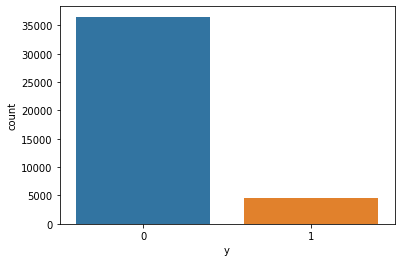

In [ ]:
ax = sns.countplot(x = df['y'])  #Imbalanced dataset
plt.show()

**Implémentation des modèles avec la base dsequilibré**





In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
columns = X_train.columns



*   Modèle simple de reseau de neurone avec une seule couche




In [ ]:
model1 = Sequential([
                    Dense(64, activation = 'relu', input_shape = (14,)),
                    Dropout(0.5),
                    Dense(1, activation = 'sigmoid')
                   ])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
history = model1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
1599/1599 [==============================] - 5s 3ms/step - loss: 5.7731 - accuracy: 0.7109 - val_loss: 0.4787 - val_accuracy: 0.7633
Epoch 2/100
1599/1599 [==============================] - 4s 2ms/step - loss: 0.5104 - accuracy: 0.7580 - val_loss: 0.4499 - val_accuracy: 0.7874
Epoch 3/100
1599/1599 [==============================] - 4s 2ms/step - loss: 0.4733 - accuracy: 0.7815 - val_loss: 0.4237 - val_accuracy: 0.8032
Epoch 4/100
1599/1599 [==============================] - 4s 2ms/step - loss: 0.4421 - accuracy: 0.8004 - val_loss: 0.4077 - val_accuracy: 0.8133
Epoch 5/100
1599/1599 [==============================] - 4s 2ms/step - loss: 0.4322 - accuracy: 0.8049 - val_loss: 0.3951 - val_accuracy: 0.8237
Epoch 6/100
1599/1599 [==============================] - 4s 3ms/step - loss: 0.4163 - accuracy: 0.8127 - val_loss: 0.3799 - val_accuracy: 0.8352
Epoch 7/100
1599/1599 [==============================] - 4s 3ms/step - loss: 0.4024 - accuracy: 0.8225 - val_loss: 0.3604 - val_ac

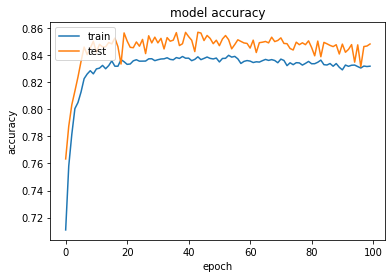

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history .history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left' )
plt.show()



*   Logistic Regression




In [ ]:
LogModel = LogisticRegression(solver='lbfgs', random_state = 100)###
LogModel = LogModel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     11631
           1       0.34      0.64      0.44       726

    accuracy                           0.90     12357
   macro avg       0.66      0.78      0.69     12357
weighted avg       0.94      0.90      0.92     12357



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDispl

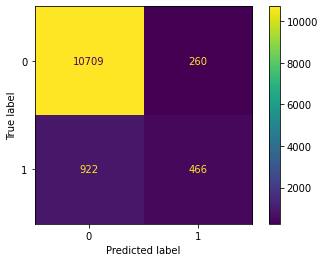

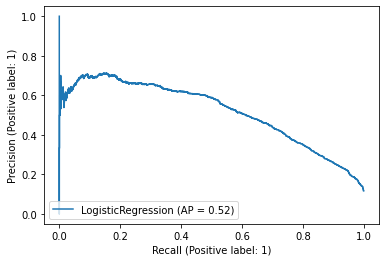

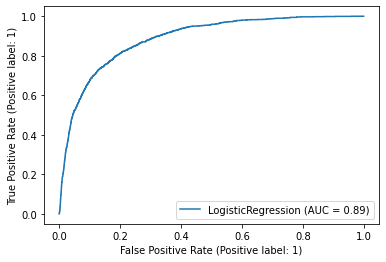

In [ ]:
print("LOGISTIC REGRESSION MODEL")
report(LogModel )


*   Random Forest


In [ ]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

RANDOM FOREST MODEL
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11505
           1       0.40      0.65      0.49       852

    accuracy                           0.91     12357
   macro avg       0.68      0.79      0.72     12357
weighted avg       0.93      0.91      0.92     12357



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDispl

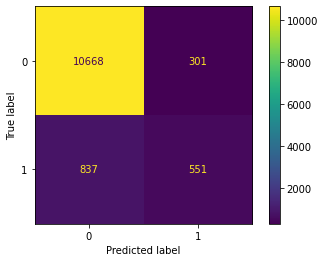

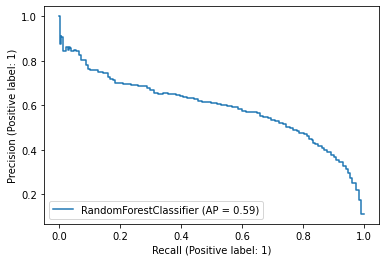

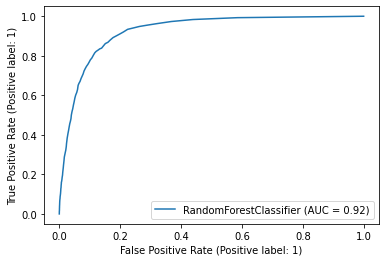

In [ ]:
print("RANDOM FOREST MODEL")
report(rfc_model)


*   Support Vector Machine



In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

SVM MODEL
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     11765
           1       0.28      0.65      0.39       592

    accuracy                           0.90     12357
   macro avg       0.63      0.78      0.67     12357
weighted avg       0.95      0.90      0.92     12357



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDispl

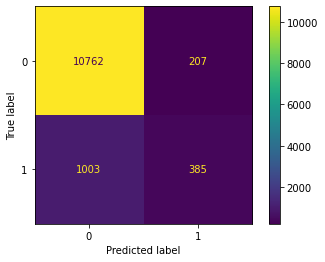

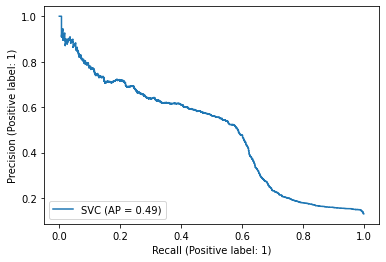

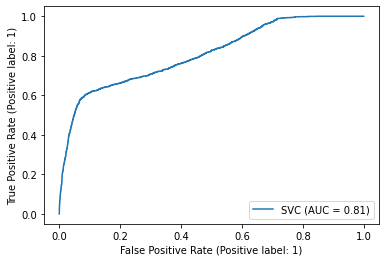

In [ ]:
print("SVM MODEL")
report(svc_model)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_score = dtree.score(X_test, y_test)
print("Decision Tree Model accuracy "+str(round(dtree_score*100, 1))+"%")

Decision Tree Model accuracy 87.6%


**Implémentation des modèles après SMOTE**

1.   Tout d'abord nous avons appliquer le SMOTE afin de generer des nouveaux exemples de la classe minoritaire.







In [ ]:
X, Y = SMOTE().fit_resample(X,Y)

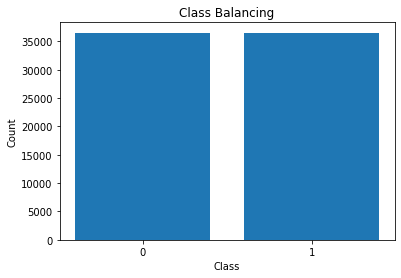

In [ ]:
y_un,count = np.unique(Y,return_counts=True)
plt.title("Class Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.bar([str(i) for i in y_un],count)
plt.show()

In [ ]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
columns = X_train.columns

In [ ]:
print("len de X_train = ", len(X_train))
print("len de y_train = ", len(y_train))

len de X_train =  51167
len de y_train =  51167


In [ ]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(51167, 14)
(51167,)
(21929, 14)
(21929,)


In [ ]:
model1 = Sequential([
                    Dense(64, activation = 'relu', input_shape = (14,)),
                    Dropout(0.5),
                    Dense(1, activation = 'sigmoid')
                   ])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                960       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
history = model1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 150)

Epoch 1/150
1599/1599 [==============================] - 9s 5ms/step - loss: 6.0098 - accuracy: 0.7173 - val_loss: 0.5251 - val_accuracy: 0.7869
Epoch 2/150
1599/1599 [==============================] - 4s 2ms/step - loss: 0.5226 - accuracy: 0.7619 - val_loss: 0.4376 - val_accuracy: 0.8059
Epoch 3/150
1599/1599 [==============================] - 4s 2ms/step - loss: 0.4698 - accuracy: 0.7863 - val_loss: 0.4144 - val_accuracy: 0.8156
Epoch 4/150
1599/1599 [==============================] - 4s 2ms/step - loss: 0.4407 - accuracy: 0.8014 - val_loss: 0.4066 - val_accuracy: 0.8224
Epoch 5/150
1599/1599 [==============================] - 4s 2ms/step - loss: 0.4212 - accuracy: 0.8139 - val_loss: 0.4160 - val_accuracy: 0.8218
Epoch 6/150
1599/1599 [==============================] - 4s 3ms/step - loss: 0.4104 - accuracy: 0.8188 - val_loss: 0.3750 - val_accuracy: 0.8330
Epoch 7/150
1599/1599 [==============================] - 4s 3ms/step - loss: 0.4030 - accuracy: 0.8216 - val_loss: 0.3579 - val_ac

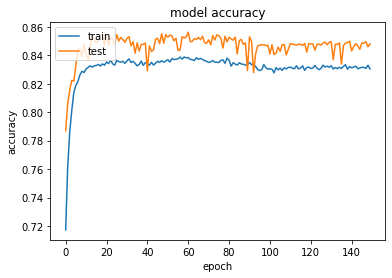

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history .history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left' )
plt.show()

In [ ]:
mycallbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)]

In [ ]:
history = model1.fit(
  X_train, #inputs
  y_train, #target vector
  epochs=150, # number of epochs
  batch_size=32,
  callbacks = mycallbacks, # early stopping
  validation_data=(X_test, y_test))

Epoch 1/150
1599/1599 [==============================] - 4s 2ms/step - loss: 0.3770 - accuracy: 0.8321 - val_loss: 0.3504 - val_accuracy: 0.8491
Epoch 2/150
1599/1599 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8326 - val_loss: 0.3519 - val_accuracy: 0.8440
Epoch 3/150
1599/1599 [==============================] - 4s 2ms/step - loss: 0.3789 - accuracy: 0.8325 - val_loss: 0.3490 - val_accuracy: 0.8479
Epoch 4/150
1599/1599 [==============================] - 4s 2ms/step - loss: 0.3786 - accuracy: 0.8319 - val_loss: 0.3505 - val_accuracy: 0.8472
Epoch 5/150
1599/1599 [==============================] - 4s 2ms/step - loss: 0.3774 - accuracy: 0.8326 - val_loss: 0.3532 - val_accuracy: 0.8483
Epoch 6/150
1599/1599 [==============================] - 4s 2ms/step - loss: 0.3776 - accuracy: 0.8312 - val_loss: 0.3492 - val_accuracy: 0.8489
Epoch 7/150
1599/1599 [==============================] - 4s 3ms/step - loss: 0.3779 - accuracy: 0.8321 - val_loss: 0.3477 - val_ac

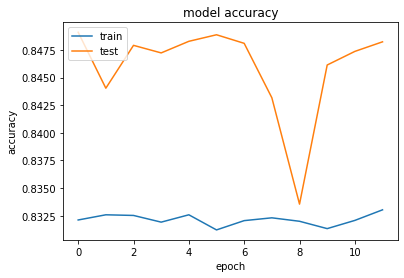

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

***Logistic Regression***






Le solver 'lbfgs' est le solver par defaut de la regression logistique, nous avons trouver une valeur d'accuracy égale à 82%.


In [ ]:
LogModel = LogisticRegression(solver='lbfgs', random_state = 100)###
LogModel = LogModel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     11624
           1       0.79      0.84      0.81     10305

    accuracy                           0.82     21929
   macro avg       0.82      0.82      0.82     21929
weighted avg       0.82      0.82      0.82     21929



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDispl

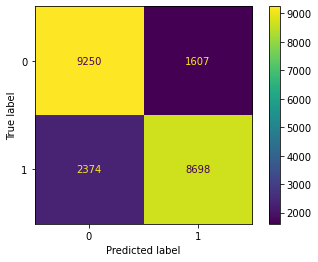

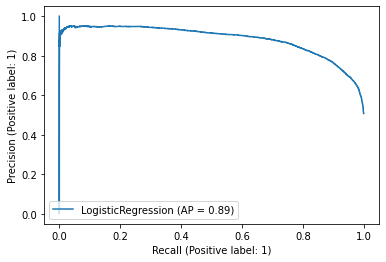

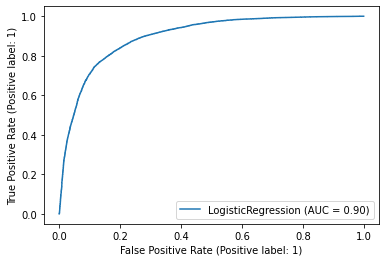

In [ ]:
print("LOGISTIC REGRESSION MODEL")
report(LogModel )

In [ ]:
LogModel = LogisticRegression(solver='liblinear', random_state = 100)###
LogModel = LogModel.fit(X_train, y_train)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     11441
           1       0.82      0.87      0.84     10488

    accuracy                           0.85     21929
   macro avg       0.85      0.85      0.85     21929
weighted avg       0.85      0.85      0.85     21929



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDispl

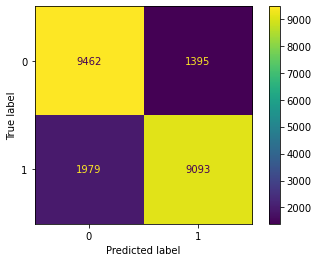

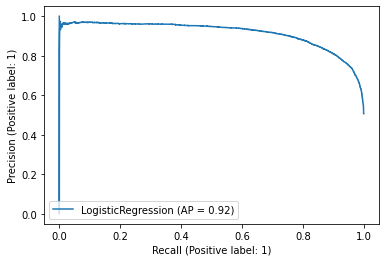

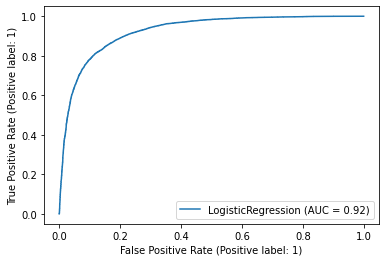

In [ ]:
print("LOGISTIC REGRESSION MODEL")
report(LogModel )

***Random Forest***

In [ ]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

RANDOM FOREST MODEL
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10562
           1       0.95      0.93      0.94     11367

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDispl

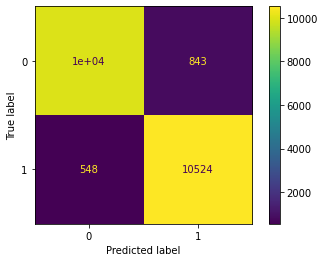

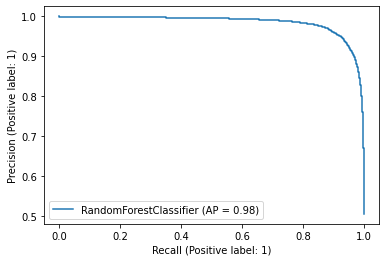

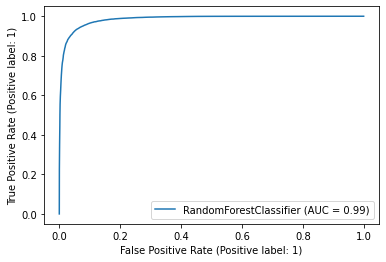

In [ ]:
print("RANDOM FOREST MODEL")
report(rfc_model)

**Support Vector Machine**

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

SVM MODEL
              precision    recall  f1-score   support

           0       0.86      0.74      0.79     12584
           1       0.70      0.83      0.76      9345

    accuracy                           0.78     21929
   macro avg       0.78      0.79      0.78     21929
weighted avg       0.79      0.78      0.78     21929



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDispl

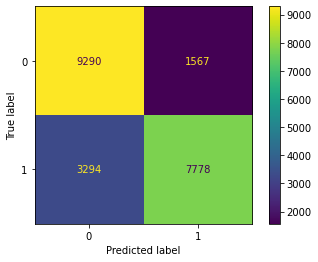

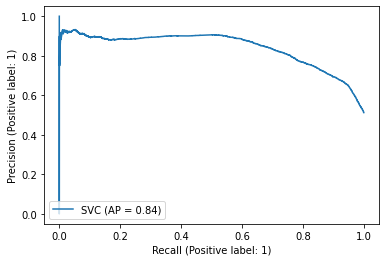

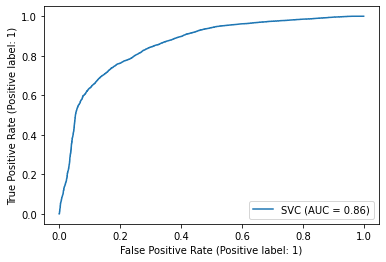

In [ ]:
print("SVM MODEL")
report(svc_model)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_score = dtree.score(X_test, y_test)
print("Decision Tree Model accuracy "+str(round(dtree_score*100, 1))+"%")

Decision Tree Model accuracy 90.3%
